In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load data
df = pd.read_csv(r"C:\Users\Mavur\OneDrive\Documents\adult 3.csv")

# Drop nulls
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop("income", axis=1)
y = df["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, "salary_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ Model and encoders saved!")


✅ Model and encoders saved!


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



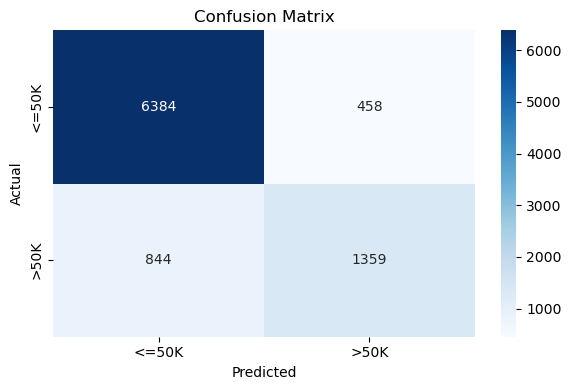

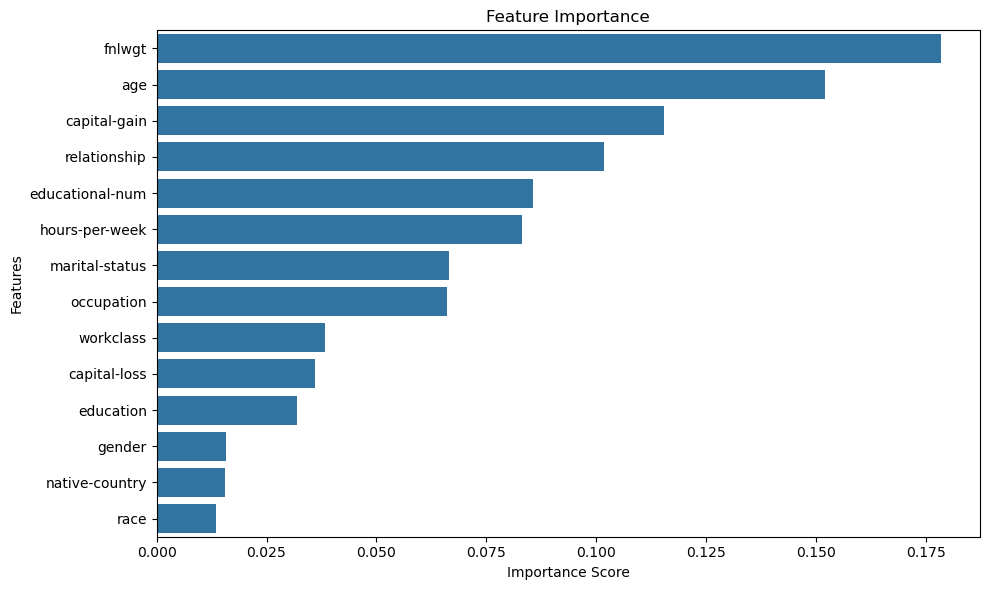

✅ Model and encoders saved successfully!


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\Mavur\OneDrive\Documents\adult 3.csv")

# Step 2: Clean the data
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Step 3: Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 4: Split features and target
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
income_classes = label_encoders['income'].classes_

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=income_classes, yticklabels=income_classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 9: Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Step 10: Save the model and encoders
joblib.dump(model, "salary_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Model and encoders saved successfully!")
